# K-means 

For this weeks assignment, the setup will be somewhat different from the previous weeks. We will jump ahead a little to an algorithm that hasn't been covered yet: *K-means*. K-means is a classic example of *unsupervised learning*, where we do not have a target output we are trying to model, but instead are just trying to extract a pattern from the whole dataset. So hopefully, together with the previous 2 programming assignments, this should round out your perspective of concrete implementations of the most common types of *machine learning* algorithms.

The goal of *K-means* is to find $k$ clusters, or groups, within a dataset. Start by reading the description of the algorithm given in section *7.3* of Alpaydin. The resulting pseudo-code for the algorithm to find $k$ clusters, is shown there in figure *7.3*:

* Initialize $m_i$, $i$ = $1$, ... , $k$, for example, to $k$ random $x^t$
* Repeat
    * For all $x^t \in X$
        * $b_i^t \leftarrow \left\{\begin{array}{ll} 1 & if\ \Vert x^t − m_i \Vert \ =\ min_j\ \Vert x^t − m_j \Vert\\ 
            0 & otherwise \\ \end{array}\right.$
    * For all $m_i$, $i$ = $1$, ... , $k$
        * $m_i \leftarrow \sum_t b_i^t x^t / \sum_t b_i^t$
* Until $m_i$ converge

There are a couple of videos by Andrew Ng on the topic that might also be helpful to understand what the algorithm does. The notation here is a little different, but the ideas are exactly the same:

Basic description of the algorithm


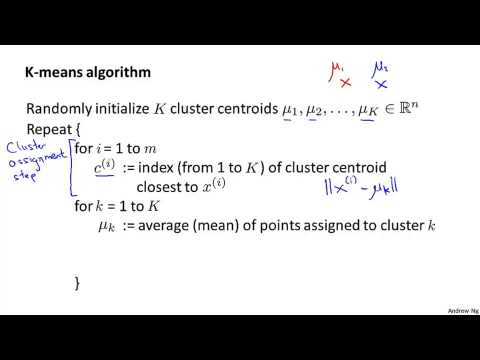

Cost function that can be used to check for convergence


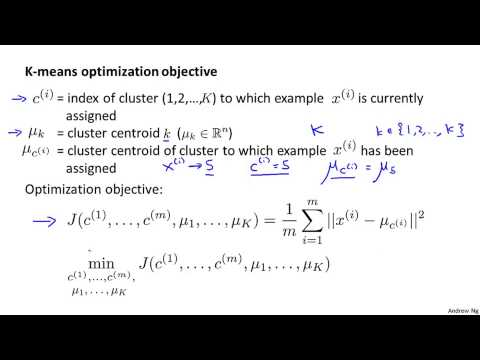

Choosing the starting points for the means


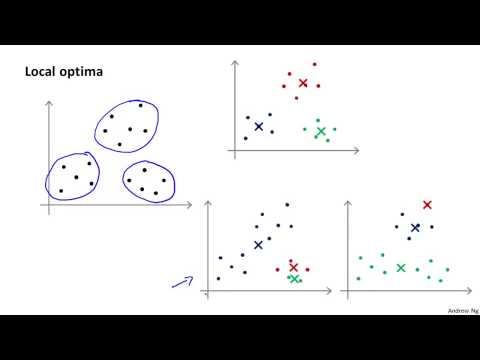

In [1]:
from IPython.display import YouTubeVideo
print('Basic description of the algorithm')
display(YouTubeVideo('6u19018FeHg'))
print('Cost function that can be used to check for convergence')
display(YouTubeVideo('omcDeBY4lGE'))
print('Choosing the starting points for the means')
display(YouTubeVideo('wniLibHEE2Y'))

## Implementing the algorithm [18 pts]

For your code, make **functions** (required in order to get the points) for each of the following components of the k-means algorithm:

* `init_clusters`: Randomly initialize means from the data [1 pt]
* `distance`: Compute the distance between 2 points [1 pt]
* `cluster_assignment`: Compute the matrix $b$ containing the assignments of points to clusters, based on the current means [4 pts]
* `compute_means`: Compute the matrix $m$ containing the computed mean vectors, based on the current assignment of clusters [3 pts]
* `plot_clusters`: Plot the means (as x's) and their assigned points (as dots), with a different color for each cluster (here you may assume the points will all be 2-dimensional, to allow them to be plotted) [4 pts]
* `is_converged`: Determine if the algorithm has converged based on the sets of current and new means. HINT: use a threshold here (for example 0.05). [2 pts]
* `kmeans`: Combine all these functions in a general k-means function [3 pts]

You will have the define the exact functions and their arguments yourself this week, so please give them descriptive names and provide some comments in your code, when needed, for clarity.

## Showing the results [4pt]

To show your code works, run the algorithm on the Iris dataset using only the last 2 variables of the data. Use a value of 3 for $k$ and plot the means with their assignments. Start by running the algorithm step by step and plotting for each step. Start with the random means and then show at least 2 more steps, to show the means moving as the algorithm iterates. Finally, show the resulting plot where the means have converged and the algorithm has stopped.

In [2]:
%matplotlib inline

import math
import matplotlib.pylab as plt
import matplotlib.cm as cm
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()

# YOUR SOLUTION HERE
def init_clusters(data, k):
    return data[np.random.choice(data.shape[0], k, replace=False), :]
def distance(p1, p2):
    return np.linalg.norm(p1-p2)
def cluster_assignment(data, cmeans):
    b = np.zeros((len(data), len(cmeans)))
    for i in range(len(data)):
        dis = [distance(j, data[i]) for j in cmeans]
        b[i, np.argmin(dis)] = 1
    return b
def compute_means(data, b):
    m = np.empty([len(b[0]), len(data[0])])
    for j in range(len(b[0])):
        cmean = np.mean(data[np.where(b[:, j] == 1)], axis=0).reshape(1, len(data[0]))
        m[j] = cmean
    return m
def plot_clusters(data, b, m):
    colors = ('purple', 'green', 'blue', 'red', 'yellow', 'pink', 'black', 'orange', 'cyan', 'gray')
    for j in range(len(b[0])):
        dataj = data[np.where(b[:, j] == 1)]
        plt.scatter(dataj[:,0], dataj[:,1], marker = 'o', s = 10, c = colors[j])
        plt.scatter(m[j][0], m[j][1], marker = 'x', c = colors[j])
    plt.show()
def is_converged(m, new_m, threshold):
    for i in range(len(m)):
        if distance(m[i], new_m[i]) > threshold:
            return False
    return True
def kmeans(data, k, threshold):
    converged = False
    m = init_clusters(data, k)                  
    while converged == False:
        b = cluster_assignment(data, m)
        new_m = compute_means(data, b)
        plot_clusters(data, b, new_m)
        converged = is_converged(m, new_m, threshold)
        m = new_m

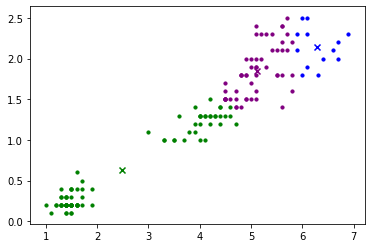

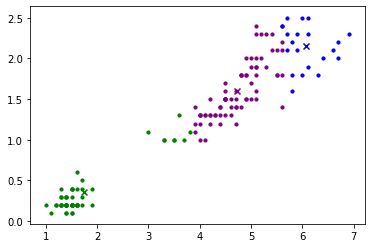

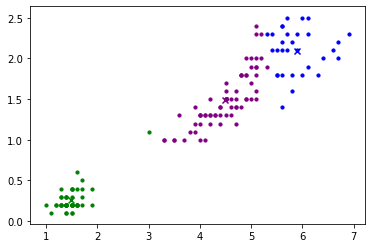

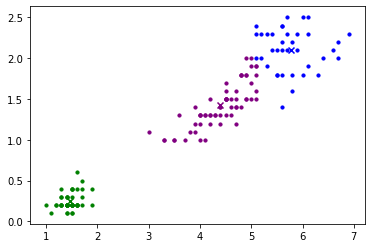

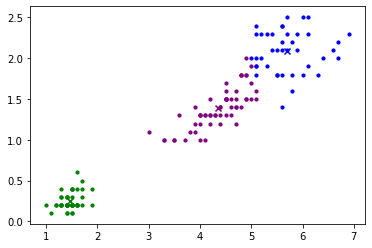

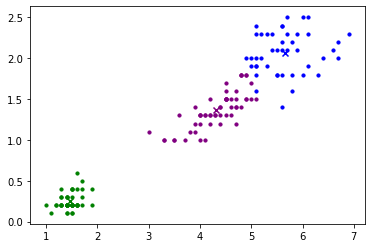

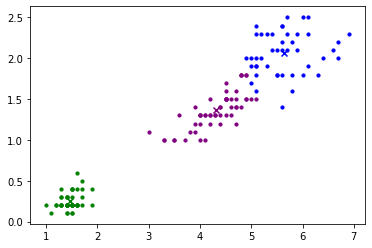

In [3]:
kmeans(iris.data[:, 2:], 3, 0.05)

## Elbow Method [8 pts]

For this dataset we have the benefit of already knowing the number of clusters. However, even if the number clusters is not known or set before hand, there ways to solve the clustering problem. One such possbile approach is the *elbow method*. Watch the video from Andrew on the topic below or find another resource describing it.

[Choosing the number of clusters](https://www.youtube.com/watch?v=izCbbMbRWHw&list=PLZ9qNFMHZ-A4rycgrgOYma6zxF4BZGGPW&index=81)

Now extend your implementation to include the following:

* `cost`: Create a sensible cost function that is minimized when steps of the algorithm are done. Use the data and the current values of $b$ and $m$. [2 pts]
* `average_cost`: Create a function to compute the converged cost of a specific value of $k$ repeatedly and averaging this. [2 pts]
* Running your code many times will most likely result in an error in your `compute_means` function at some point. Find out what is causing the error and create a new version of `compute_means` that solves this problem in some sensible way. [2 pts]
    * *Note: If many runs of the algorithm do not result in any errors at all, then your old `compute_means` was already correct and you may just use that.*
* Compute the average cost for k values $1$ to $10$ and combine them in a plot. Briefly discuss if this plot corresponds with your expectations. [2 pts]

In [4]:
# YOUR SOLUTION HERE
def cost(data, b, m):
    cost = 0
    for i in range(len(m)):
        datai = data[np.where(b[:, i] == 1)]
        cost += np.sum([distance(j, m[i]) for j in datai])
    return cost
def compute_means(data, b):
    m = []
    for j in range(len(b[0])):
        if len(data[np.where(b[:, j] == 1)]) > 0:
            cmean = np.mean(data[np.where(b[:, j] == 1)], axis=0).reshape(1, len(data[0]))
            m.append(cmean)
    return m
def kmeans2(data, k, threshold): # not to plot
    converged = False
    m = init_clusters(data, k)                  
    while converged == False:
        b = cluster_assignment(data, m)
        new_m = compute_means(data, b)
        converged = is_converged(m, new_m, threshold)
        m = new_m
    return data, b, m
def average_cost(data, k, n, threshold):
    costs = []
    for i in range(n):
        data, b, m = kmeans2(data, k, threshold)
        costs.append(cost(data, b, m)) 
    return np.mean(costs)

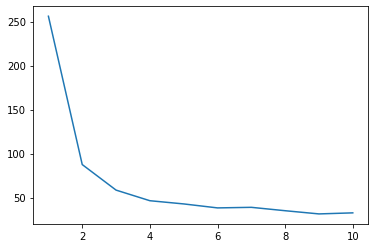

In [5]:
y = []
for k in range(1, 11):
    y.append(average_cost(iris.data[:, 2:], k, 10, 0.05))
plt.plot(list(range(1, 11)), y)
plt.show()

This plot corresponds with my expectations.